# Ideas

* Correlate `elapsed_time` between first case and `mandate_when` with `cases_per_million`
* Correlate `mask_mandate` with `pos_cases_per_tests`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sqlalchemy as sq
location = 'sqlite:///data/nyt_covid.db'
engine = sq.create_engine(location)
engine.table_names()

['county_dataset', 'state_dataset']

In [3]:
cnx = sq.create_engine(location)
df_county = pd.read_sql_table('county_dataset', cnx)
df_state = pd.read_sql_table('state_dataset', cnx)

# Analysis

## County Mask Use

NOTE: Reminder that county covid cases represent the mean of all total cases from June onwards.

In [4]:
df_county['mask_wearer'] = (df_county['mask_always'] + df_county['mask_frequently'])*100
df_county['non_wearer'] = (df_county['mask_rarely'] + df_county['mask_never']+ df_county['mask_sometimes'])*100

In [5]:
df_county.groupby('state').mean()[['mask_wearer','non_wearer','covid_cases','covid_deaths']].sort_values('mask_wearer')

,mask_wearer,non_wearer,covid_cases,covid_deaths
state,,,,
North Dakota,50.907843,49.090196,82.981837,1.650196
Montana,52.532609,47.463043,43.033351,0.669810
Wyoming,56.823810,43.185714,88.164444,1.057143
Missouri,57.709346,42.289720,131.670859,2.085625
South Dakota,58.167742,41.843548,116.430813,1.682266
Idaho,60.497619,39.504762,262.011330,2.026817
Iowa,61.326596,38.669149,319.559007,7.279433
Nebraska,61.650000,38.352381,252.386349,3.382328
Oklahoma,61.682895,38.313158,355.606352,6.894386


In [6]:
df_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3121 entries, 0 to 3120
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fips                 3121 non-null   float64
 1   covid_cases          3121 non-null   float64
 2   covid_deaths         3121 non-null   float64
 3   mask_never           3121 non-null   float64
 4   mask_rarely          3121 non-null   float64
 5   mask_sometimes       3121 non-null   float64
 6   mask_frequently      3121 non-null   float64
 7   mask_always          3121 non-null   float64
 8   state                2877 non-null   object 
 9   county               2877 non-null   object 
 10  sumlev               2877 non-null   float64
 11  region_fip           2877 non-null   float64
 12  division_fip         2877 non-null   float64
 13  pop                  2877 non-null   float64
 14  births               2877 non-null   float64
 15  intnl_migration      2877 non-null   f

Text(0.5, 1.0, 'Mean of total covid cases')

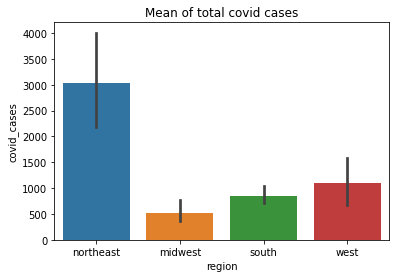

In [7]:
sns.barplot(x='region',y='covid_cases',data=df_county, order=['northeast','midwest','south','west'])
plt.title('Mean of total covid cases')

Text(0.5, 1.0, 'Mean of total covid cases per thousand')

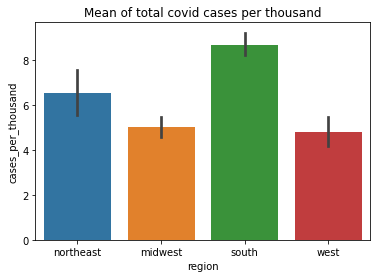

In [8]:
sns.barplot(x='region',y='cases_per_thousand',data=df_county, order=['northeast','midwest','south','west'])
plt.title('Mean of total covid cases per thousand')

## State Mask Use

In [9]:
cols = ['fips', 'sumlev', 'region', 'division', 'state_x', 'total_area_sqmi',
       'total_area_sqkm', 'land_area_sqmi', 'land_area_sqkm',
       'total_water_area_sqmi', 'total_water_area_sqkm',
       'inland_water_area_sqmi', 'inland_water_area_sqkm',
       'coastal_water_area_sqmi', 'coastal_water_area_sqkm',
       'great_lakes_water_area_sqmi', 'great_lakes_water_area_sqkm',
       'territorial_water_area_sqmi', 'territorial_water_area_sqkm',
       'latitude', 'longitude', 'cases_per_million',
       'cases_per_hthousand', 'cases_per_thousand', 'cases_per_hundred']

In [10]:
# Format all columns
for col in cols:
    df_state[col] = df_state[col].astype(str)
    df_state[col] = df_state[col].str.replace(',','')
    df_state[col] = df_state[col].str.replace('None','NaN')
    df_state[col] = df_state[col].astype(float)

In [11]:
df_state['pop_density'] = df_state['popestimate2019']/df_state['land_area_sqmi']
df_state['covid_per_density'] = df_state['covid_cases']/df_state['pop_density']

In [12]:
df_state['covid_per_sqmi'] = df_state['covid_cases']/df_state['land_area_sqmi']

In [13]:
df_graph = df_state[(df_state['name']=='Ohio')|
              (df_state['name']=='New Hampshire')|
              (df_state['name']=='Texas')|
              (df_state['name']=='Massachusetts')|
              (df_state['name']=='California')|
              (df_state['name']=='Florida')]

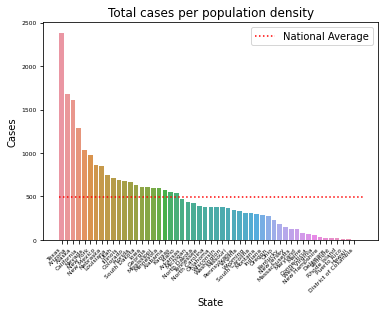

In [14]:
ax = sns.barplot(x='name',y='covid_per_density',data=df_state.sort_values('covid_per_density', ascending=False))
plt.xlabel('State')
plt.ylabel('Cases')
plt.title('Total cases per population density')
plt.xticks(rotation=45, horizontalalignment='right',)
plt.hlines(df_state['covid_per_density'].mean(),-0.5,52.5,linestyles=':',color='red',label='National Average')
plt.legend()

ax.tick_params(axis = 'both', which = 'major', labelsize = 6)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 6)

# plt.savefig('exports/all_states_avg.png',dpi=300, bbox_inches='tight')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'California'),
  Text(1, 0, 'Florida'),
  Text(2, 0, 'Massachusetts'),
  Text(3, 0, 'New Hampshire'),
  Text(4, 0, 'Ohio'),
  Text(5, 0, 'Texas')])

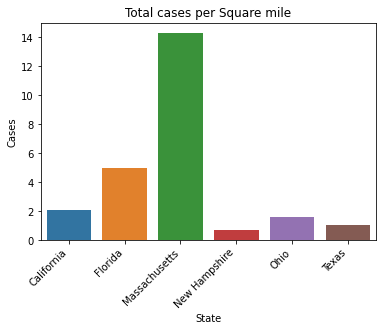

In [15]:
sns.barplot(x='name',y='covid_per_sqmi',data=df_graph)
plt.xlabel('State')
plt.ylabel('Cases')
plt.title('Total cases per Square mile')
plt.xticks(rotation=45, horizontalalignment='right')

In [16]:
df_state.describe()[['cases_per_million']]

,cases_per_million
count,52.000000
mean,8736.378138
std,4675.857716
min,1054.185763
25%,5580.525050
50%,8131.808681
75%,11563.160132
max,20778.777239


<AxesSubplot:xlabel='cases_per_million'>

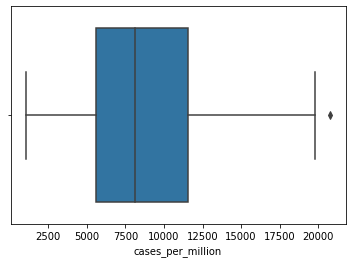

In [17]:
sns.boxplot(df_state['cases_per_million'])

The populations of each state differ, but the raw numbers are hard to interpret. For this reason each state is categorized into size.

Based on this boxplot the following seems reasonable:
* `small`: less than 2 million
* `medium`: 2 million - 10 million
* `large`: greater than 10 million

In [18]:
def pop_size_cat(cell):
    '''
    Categorizes each state by their size
    '''
    if pd.isnull(cell):
        return 'no data'
    elif cell < 2000000:
        return 'small'
    elif cell > 10000000:
        return 'large'
    elif (cell > 2000000) & (cell < 10000000):
        return 'medium'
    else:
        return 'no data'

In [19]:
df_state['pop_size'] = df_state['popestimate2019'].apply(pop_size_cat)

In [20]:
df_state['pop_in_mill'] = df_state['popestimate2019']/1000000

In [21]:
df_state.groupby('pop_size').mean()[['pop_in_mill','cases_per_million']]

,pop_in_mill,cases_per_million
pop_size,,
large,18.634202,10523.479851
medium,5.239404,9363.504635
small,1.134805,6493.480982


In [22]:
state_order = ['small','medium','large']

Text(0, 0.5, 'Total Cases')

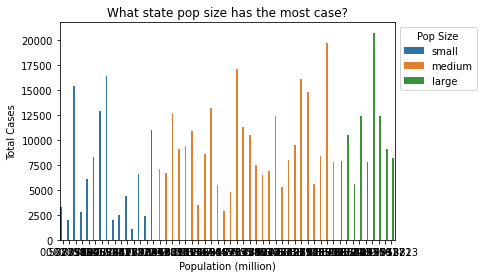

In [23]:
g = sns.barplot(x='pop_in_mill',y='cases_per_million',hue='pop_size',data=df_state,hue_order=state_order)
#plt.hlines(df_state['non_wearer'].mean(),-0.5,3.5,linestyles='--',color='red',label='National Average')
g.legend(bbox_to_anchor=(1,1),title='Pop Size')
plt.title('What state pop size has the most case?')
plt.xlabel('Population (million)')
plt.ylabel('Total Cases')

In [24]:
g = sns.lineplot(x='date',y='cases_per_million',hue='pop_size',data=df_state, hue_order = state_order)
plt.title("Cases by State's Population Size")
plt.xlabel('Date')
plt.ylabel('Cases per Million')
handles, labels = g.get_legend_handles_labels()
g.legend(bbox_to_anchor=(1,1),title='Pop Size',handles=handles[1:], labels=labels[1:])
# plt.savefig('cases_per_pop.png',dpi=300,bbox_layout='tight')

ValueError: Could not interpret input 'date'

# Influence of Mask Mandates

* [Source 1](https://www.aarp.org/health/healthy-living/info-2020/states-mask-mandates-coronavirus.html)
* [Source 2](https://www.cnn.com/2020/06/19/us/states-face-mask-coronavirus-trnd/index.html)

Dataset collected from above sources. In situations when the date was different, the earliest date was taken. `Type` includes tags for description of mandate currently in effect.

In [28]:
df_mand = pd.read_excel('data/added_data/mask_mandates.xlsx',skiprows=2)
df_mand.columns = df_mand.columns.str.lower()

In [29]:
df_mand['type'] = df_mand['type'].str.lower()
df_mand['type_split'] = df_mand['type'].str.split(',')

In [30]:
df_mand.head()

,state,mandate,date,type,type_split
0,Alabama,Yes,2020-07-16,indoor and outdoor,[indoor and outdoor]
1,Alaska,No,NaT,NaN,NaN
2,Arizona,No,NaT,NaN,NaN
3,Arkansas,Yes,2020-07-20,children exempt,[children exempt]
4,California,Yes,2020-06-18,toddlers exempt,[toddlers exempt]


In [33]:
df_state = df_state.groupby(['state','date']).mean().reset_index()

KeyError: 'state'

In [27]:
df_states = df_states.merge(df_mand, on='state',suffixes=['','_mandate'])

NameError: name 'df_states' is not defined

In [ ]:
df_states['pop_size'] = df_states['popestimate2019'].map(pop_size_cat)

In [ ]:
df_graph_mand = df_states[(df_states['state']=='Ohio')|
              (df_states['state']=='New Hampshire')|
              (df_states['state']=='Texas')|
              (df_states['state']=='Massachusetts')|
              (df_states['state']=='California')|
              (df_states['state']=='Florida')]

In [ ]:
def who_exempt(cell):
    if pd.isna(cell):
        return 'no mandate'
    elif 'children' in cell:
        return 'child exempt'
    elif 'toddler' in cell:
        return 'toddler exempt'
    else:
        return 'no exemptions'

In [ ]:
df_states['children_toddlers_none'] = df_states['type'].apply(who_exempt)

In [ ]:
df_states['month_mandate'] = df_states['date_mandate'].dt.month
df_states['month_mandate'] = df_states['month_mandate'].fillna('no mandate')

In [ ]:
import datetime as dt

In [ ]:
df_states['date_mandate'][0] < dt.datetime.strptime('20200718','%Y%m%d')

In [ ]:
def mandate_when(x):
    if pd.isna(x):
        return 'No Mandate'
    elif x<dt.datetime.strptime('20200515','%Y%m%d'):
        return 'Before May 15'
    elif x>dt.datetime.strptime('20200715','%Y%m%d'):
        return 'After Jul 15'
    else:
        return 'In Between'

In [ ]:
df_states['mandate_when'] = df_states['date_mandate'].apply(mandate_when)

In [ ]:
m = sns.lineplot(x='date',y='mask_wearer',hue='mandate_when',data=df_states,
             hue_order=['Before May 15','In Between','After Jul 15','No Mandate'])

handles, labels = m.get_legend_handles_labels()
m.legend(bbox_to_anchor=(1,1),title='Mandates enacted',handles=handles[1:], labels=labels[1:])

plt.title('Mask wearing in context of mandate')
plt.xlabel('Date')
plt.ylabel('Percent who wear masks')

__Interpretation:__ While there was a drop in mask wearing across the board, states who gave mandatory mask orders earlier were more likely to be wearing masks currently.

In [ ]:
m = sns.lineplot(x='date',y='cases',hue='mandate_when',data=df_states,
             hue_order=['Before May 15','In Between','After Jul 15','No Mandate'])

handles, labels = m.get_legend_handles_labels()
m.legend(bbox_to_anchor=(1,1),title='Mandates enacted',handles=handles[1:], labels=labels[1:])

plt.title('Positive cases in context of mandate')
plt.xlabel('Date')
plt.ylabel('Positive cases')

plt.savefig('cases_madate.png', dpi=300, bbox_inches='tight')

__Interpretation:__ Mask mandated seem to have been enacted as reactionary, not preventative, measures. Mandates went into effect around the time that cases increased.

In [ ]:
a = sns.lineplot(x='date',y='deaths',hue='mandate_when',data=df_states,
             hue_order=['Before May 15','In Between','After Jul 15','No Mandate'])

plt.title('Deaths in context of mandate')
plt.xlabel('Date')
plt.ylabel('Deaths')

handles, labels = a.get_legend_handles_labels()
a.legend(bbox_to_anchor=(1.38,1),title='Mandates enacted',handles=handles[1:], labels=labels[1:])

#plt.savefig('deaths_mandate.png', dpi=300, bbox_inches='tight')

__Interpretation:__ Mandates went into effect around the time that deaths increased.

In [ ]:
o = sns.lineplot(x='date',y='cases_per_million',hue='mandate_when',data=df_states,
             hue_order=['Before May 15','In Between','After Jul 15','No Mandate'])

handles, labels = o.get_legend_handles_labels()
o.legend(bbox_to_anchor=(1.38,1),title='Mandates enacted',handles=handles[1:], labels=labels[1:])

plt.title('Positive cases per million in context of mandate')
plt.xlabel('Date')
plt.ylabel('Positive cases per million')

# plt.savefig('cases_madate.png', dpi=300, bbox_inches='tight')

In [ ]:
month_map = {
    1:'Jan',
    2:'Feb',
    3:'March',
    4:'April',
    5:'May',
    6:'June',
    7:'July',
    8:'Aug',
    9:'Sept',
    10:'Oct',
    11:'Nov',
    12:'Dec'
}

In [ ]:
df_states['month_case'] = df_states['date'].dt.month

In [ ]:
df_states['month_case_name'] = df_states['month_case'].map(month_map)

In [ ]:
df_cat_graph = df_states[df_states['month_case'] >= 7]

In [ ]:
df_cat_graph = df_cat_graph.groupby('state').mean().reset_index()
df_cat_graph['pop_size'] = df_cat_graph['popestimate2019'].map(pop_size_cat)
df_cat_graph = df_cat_graph.merge(df_states[['state','mandate_when']],on='state')
df_cat_graph['month_case_name'] = df_cat_graph['month_case'].map(month_map)

In [ ]:
sns.barplot(x='mandate_when',y='cases_per_thousand',hue='pop_size',
            data=df_cat_graph, hue_order=state_order, 
            order=[
                'No Mandate',
                'Before May 15',
                'In Between',
                'After Jul 15'
            ])
plt.title('State population size and mask mandate vs cases since July')
plt.ylabel('Cases per Thousand')
plt.xlabel('Date of Mask Mandate')

__Interpretation:__ More evidence that mandates were reactionary with some additional insights: 

* Those who enacted mandates before May have less cases per thousand than those who enacted mandates between May and Jul. 
* States who enacted mandates after Jul are doing better than either early mandaters, although this may be due to lack of data.
* States who have no mandate are overtaking the late adopters

NOTE: The `In Between` category might be too broad, given the ginormous confidence interval.

# Hypothesis Testing

__Idea:__ The main reason for adherence to masks is a sense of danger. 

__Hypothesis:__ Mask wearing is affected by both early mask orders and higher cases per million.

In [ ]:
db = h.db_load_table('covid_states',db='covid.db')

In [ ]:
abbrev = pd.read_csv('data/abbrevs.csv')

In [ ]:
abbrev.head()

In [ ]:
db = db.merge(abbrev, left_on='state',right_on='Abbreviation')

In [ ]:
db = db[['date','State','positiveIncrease','positive','negative','death','totalTestResults']]

In [ ]:
db = db[['date','State','positiveIncrease','positive','negative','death','totalTestResults']]
db.columns = ['date','state','new_positive','total_positive','total_negative','total_death','total_test_results']
db.head()

In [ ]:
list_diff(list(df_states['state'].unique()),list(db['state'].unique()))

In [ ]:
df_states = df_states.merge(db, on=['state','date'], suffixes=('_nyt','_ct'))

In [ ]:
df_states['new_pos_hundred'] = (df_states['new_positive']/df_states['popestimate2019']) * 100
df_states['new_pos_thousand'] = (df_states['new_positive']/df_states['popestimate2019']) * 1000
df_states['new_pos_hthousand'] = (df_states['new_positive']/df_states['popestimate2019']) * 100000
df_states['new_pos_million'] = (df_states['new_positive']/df_states['popestimate2019']) * 1000000

In [ ]:
sns.lineplot(x='date',y='new_pos_million',data=df_states)

In [ ]:
df_graph = df_states[(df_states['state']=='Ohio')|
              (df_states['state']=='Massachusetts')|
              (df_states['state']=='Texas')]

In [ ]:
df_graph = df_graph[['state','date','new_pos_million','mask_wearer']]
df_graph.head()

In [ ]:
def graph_case_v_mask(state):
    k = sns.lineplot(x='date',y='mask_wearer',data=df_states[df_states['state']==state], color='red',label='Mask Wearing')
    plt.title(f'New Cases vs Mask Wearing in {state}')
    plt.ylabel('Mask wearing (%)')
    plt.legend(bbox_to_anchor = (1.445,0.9))
    ax = k.twinx()
    sns.lineplot(x='date',y='new_pos_million',data=df_states[df_states['state']==state],ax=ax, label = 'New Cases per Million')
    plt.ylabel('New cases per million')
    plt.xlabel('Date')
    plt.legend(bbox_to_anchor = (1.1,1))


In [ ]:
graph_case_v_mask('Ohio')
plt.ylim(0,700)

In [ ]:
graph_case_v_mask('Texas')
plt.ylim(0,700)

In [ ]:
graph_case_v_mask('California')
plt.ylim(0,700)

In [ ]:
graph_case_v_mask('Florida')
plt.ylim(0,700)

In [ ]:
df